# TP: Illustration de la loi des grands nombres et du théorème central limite
## I. Pré-traitement
### I.1 Librairies

In [1]:
## Scientific libraries
##=====================

## Plot libraries
##===============

### I.2 Variables globales

## II. Et on relance des dés

***Questions*** Étudier la fonction `simulation_somme_des`:
- Que fait t'elle ?
- Afficher le résultat de cette fonction sur un graphique (mettre des labels sur les axes, un titre, de la couleur, etc) pour différents nombres de dés.
- Modifier le graphique pour qu'une ligne soit affiché plutot que des points (regarder la documentation ou google)
- Modifier le graphique pour que des batons soit affiché plutot que des points (regarder la documentation ou google) 

In [57]:
simulation_somme_des = function( n_des , n_tirages = 1e6 , n_faces = 6 )
{
	tirages = matrix( base::sample( 1:n_faces , n_tirages * n_des , replace = TRUE ) , nrow = n_des )
	sommes = base::apply( tirages , 2 , base::sum )
	frequences = base::table( base::factor( sommes , levels = n_des:(n_faces * n_des) ) ) / n_tirages
	
	return(frequences)
}

In [58]:
####################################
## Écrire votre réponse entre ici...

n_des   = 5
n_faces = 6
n_tirages = 1e6

frequences = simulation_somme_des( n_des , n_tirages = n_tirages , n_faces = n_faces )

## ... et la
####################################

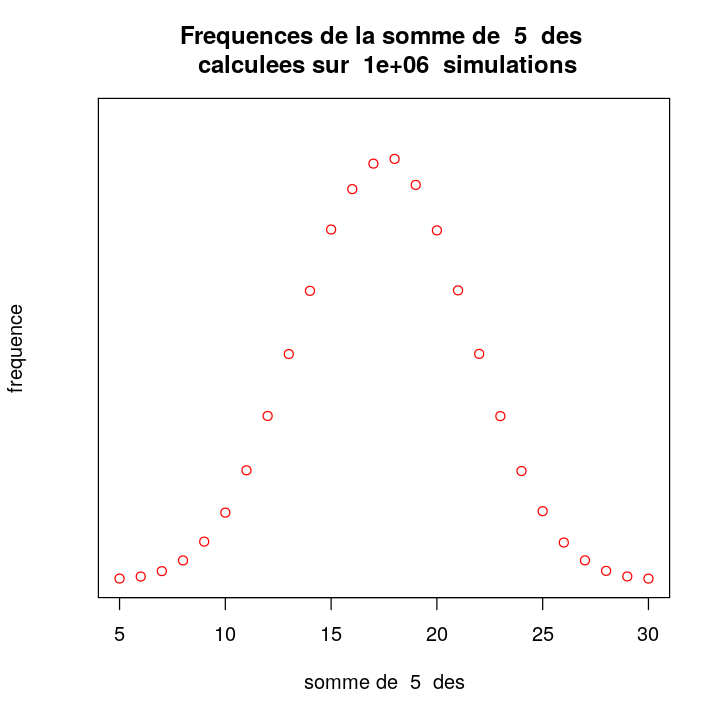

In [59]:
base::options( repr.plot.width = 6 , repr.plot.height = 6 )
graphics::par( mfrow = base::c(1,1) )

titre = base::paste( "Frequences de la somme de " , n_des , " des \n" , "calculees sur " , n_tirages , " simulations" )
xlab = base::paste( "somme de " , n_des , " des" )
ylab = "frequence"
plot( as.double(names(frequences)) , frequences , col = "red" , main = titre , xlab = xlab , ylab = ylab , ylim = base::c( 0 , 1.1 * base::max( frequences , 0 ) ) )


***Question*** Examinez la fonction `densite_somme_de`:
- Comprennez son fonctionnement,
- Affichez son résultat,
- Ajouter le aux graphes précédents,
- Justification et conclusion ?

In [51]:
densite_somme_des = function( n_des , n_faces = 6 , size_density = 500 )
{
	x = base::seq( n_des , n_des * n_faces , length = size_density )
	loc   = ( 1 + n_faces ) / 2
	scale = base::sqrt( ( ( n_faces - 1 + 1 )^2 - 1 ) / 12 )
	density = stats::dnorm( x , mean = n_des * loc , sd = base::sqrt(n_des) * scale )
	names(density) = x
	return(density)
}

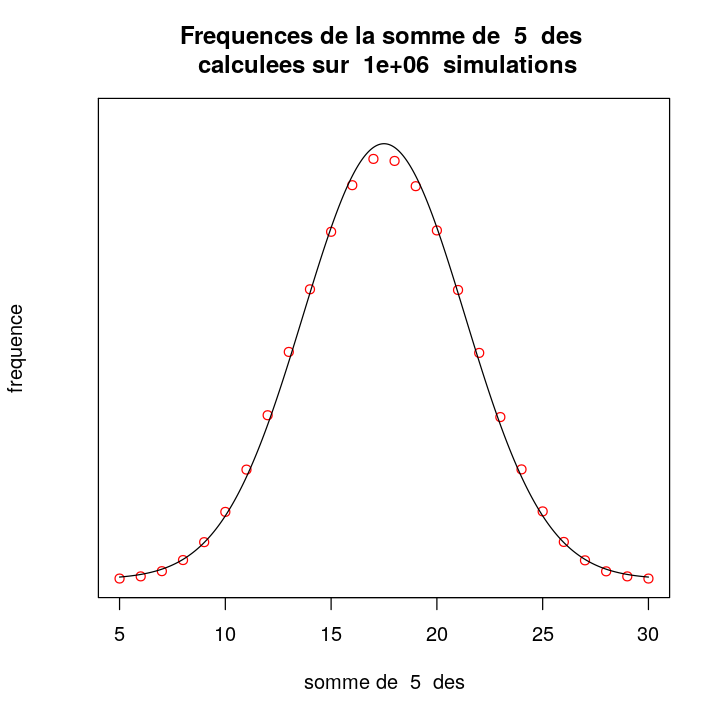

In [52]:
####################################
## Écrire votre réponse entre ici...
base::options( repr.plot.width = 6 , repr.plot.height = 6 )
graphics::par( mfrow = base::c(1,1) )


density = densite_somme_des( n_des , n_faces )
titre = base::paste( "Frequences de la somme de " , n_des , " des \n" , "calculees sur " , n_tirages , " simulations" )
xlab = base::paste( "somme de " , n_des , " des" )
ylab = "frequence"
plot( as.double(names(frequences)) , frequences , col = "red" , main = titre , xlab = xlab , ylab = ylab , ylim = base::c( 0 , 1.1 * base::max( frequences , 0 ) ) )
lines( as.double(names(density)) , density )

## ... et la
####################################

***Questions*** Reprenez les codes précédents en faisant décroitre le nombre de tirage par puissance de 10. Conclusion ?

In [6]:
####################################
## Écrire votre réponse entre ici...

## ... et la
####################################

## III. Moyenne d'une loi
***Objectif*** La loi des grands nombres dans la pratique.

***Méthode générale***
- Choisir une loi $\mathbb{P}$,
- Effectuer $p$ échantillons de $n$ tirages selon la loi $\mathbb{P}$,
- Calculer la moyenne de chacun des échantillons.

***Notes*** Dans R, les lois de probabilités sont accessibles de la manière suivante:
- `d<loi>` pour la fonction de densité,
- `p<loi>` pour la CDF ($\mathbb{P}(X<x)$),
- `q<loi>` pour la fonction quantile (pseudo-inverse de la CDF),
- `r<loi>` pour le générateur de valeur aléatoire,

Par exemple pour la loi uniforme nous avons les quatre fonctions suivantes : `dunif`, `punif`, `qunif` et `runif`. Ne pas oublier de regarder la documentation pour voir les arguments des fonctions qui dépendent des lois!


### III.1 Loi uniforme

- Réaliser $p=5$ tirages de $n=1000$ réalisations d'une loi uniforme $\mathcal{U}(0,1)$.
- Pour chaque tirages $X_{k=1...n}$, et pour tout $i\in\{1,...,n\}$, calculer la moyenne des $X_{k=1...i}$
- Tracer cette moyenne en fonction de $i$, et afficher la droite d'équation $y = (a+b) / 2$.

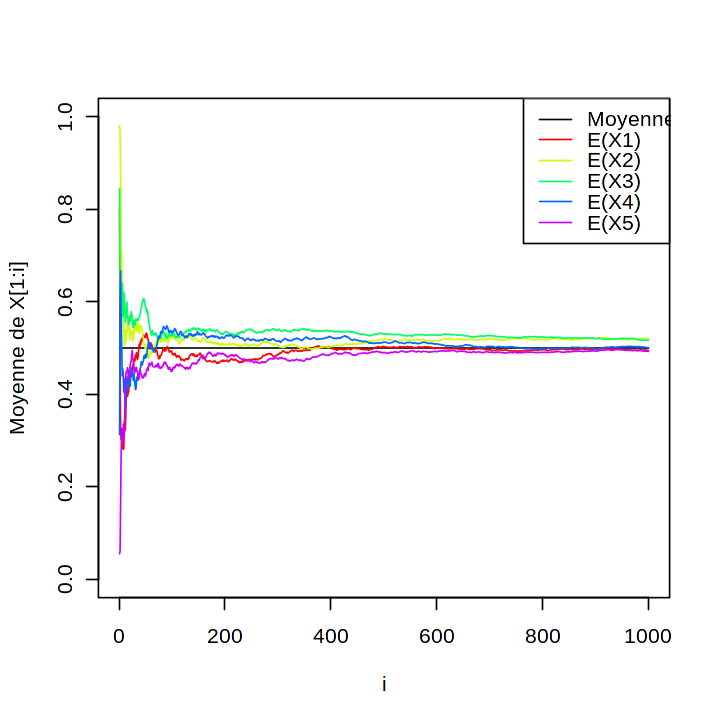

In [36]:
####################################
## Écrire votre réponse entre ici...

X   = matrix( runif( 5 * 1000 , min = 0 , max = 1 ) , nrow = 1000 )
moy = base::apply( X , 2 , cumsum ) / 1:1000

base::options( repr.plot.width = 6 , repr.plot.height = 6 )
graphics::par( mfrow = base::c(1,1) )

colors = grDevices::rainbow(5)
plot( 1:1000 , base::rep( 1 / 2 , 1000 ) , type = "l" , ylim = base::c(0,1) , xlab = "i" , ylab = "Moyenne de X[1:i]" )
for( p in 1:5 )
	lines( 1:1000 , moy[,p] , col = colors[p] )
legend( "topright" , base::c("Moyenne","E(X1)","E(X2)","E(X3)","E(X4)","E(X5)") , col = base::c("black",colors) , lty = base::rep(1,6) )

## ... et la
####################################

### III.2 Loi normale

- Réaliser $p=5$ tirages de $n=1000$ réalisations d'une loi Normale $\mathcal{N}(\mu=10,\sigma^2)$, avec $\sigma\in\{0.5,1,2,4,8\}$.
- Pour chaque tirages $X_{k=1...n}$, et pour tout $i\in\{1,...,n\}$, calculer la moyenne des $X_{k=1...i}$
- Tracer cette moyenne en fonction de $i$, et afficher la droite d'équation $y = \mu$.

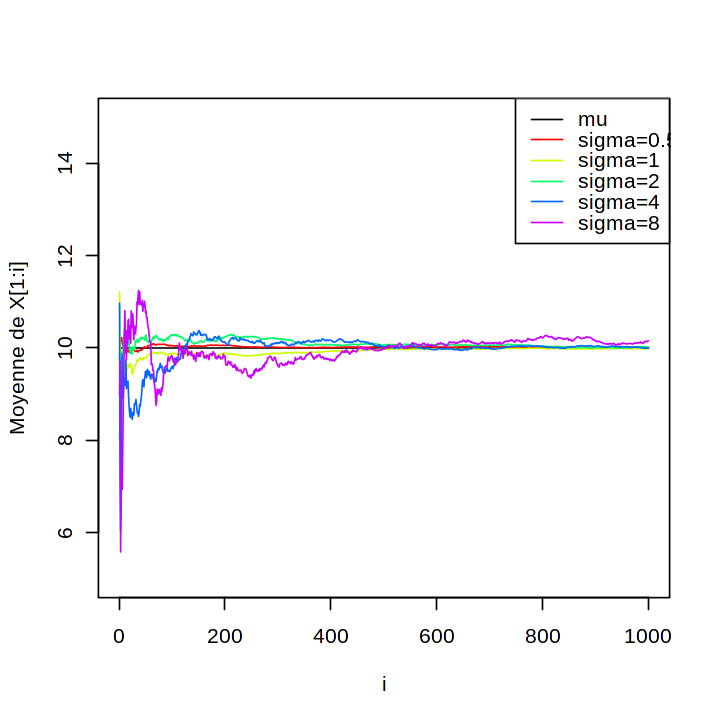

In [37]:
####################################
## Écrire votre réponse entre ici...
X = NULL
for( sigma in base::c(0.5,1,2,4,8) )
	X   = base::cbind( X , rnorm( 1000 , mean = 10 , sd = sigma ) )
moy = base::apply( X , 2 , cumsum ) / 1:1000

base::options( repr.plot.width = 6 , repr.plot.height = 6 )
graphics::par( mfrow = base::c(1,1) )

colors = grDevices::rainbow(5)
plot( 1:1000 , base::rep( 10 , 1000 ) , type = "l" , ylim = base::c(5,15) , xlab = "i" , ylab = "Moyenne de X[1:i]" )
for( p in 1:5 )
	lines( 1:1000 , moy[,p] , col = colors[p] )
legend( "topright" , base::c("mu","sigma=0.5","sigma=1","sigma=2","sigma=4","sigma=8") , col = base::c("black",colors) , lty = base::rep(1,6) )

## ... et la
####################################

### III.3 Loi exponentielle

- Réaliser $p=5$ tirages de $n=1000$ réalisations d'une loi Exponentielle $\mathcal{E}(\lambda)$, avec $\lambda\in\{0.5,1,2,4,8\}$.
- Pour chaque tirages $X_{k=1...n}$, et pour tout $i\in\{1,...,n\}$, calculer la moyenne des $X_{k=1...i}$
- Tracer cette moyenne en fonction de $i$, et afficher les droites d'équations $y = \frac{1}{\lambda}$.

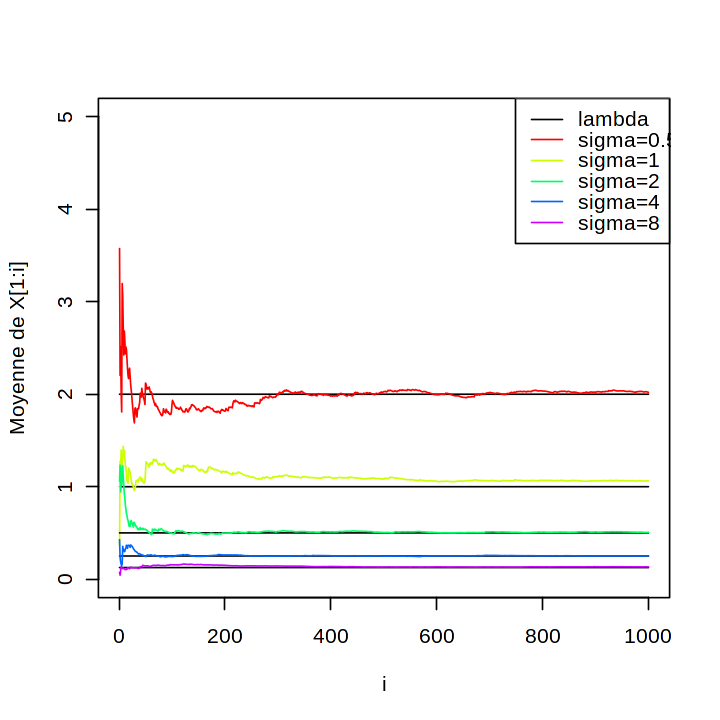

In [38]:
####################################
## Écrire votre réponse entre ici...
X = NULL
lambdas = base::c(0.5,1,2,4,8)
for( lambda in lambdas )
	X   = base::cbind( X , rexp( 1000 , rate = lambda ) )
moy = base::apply( X , 2 , cumsum ) / 1:1000

base::options( repr.plot.width = 6 , repr.plot.height = 6 )
graphics::par( mfrow = base::c(1,1) )

colors = grDevices::rainbow(5)
plot( 1:1000 , base::rep( 10 , 1000 ) , type = "l" , ylim = base::c(0,5) , xlab = "i" , ylab = "Moyenne de X[1:i]" )
for( p in 1:5 )
{
	lines( 1:1000 , base::rep( 1. / lambdas[p] , 1000 ) , type = "l" , col = "black" )
	lines( 1:1000 , moy[,p] , col = colors[p] )
}
legend( "topright" , base::c("lambda","sigma=0.5","sigma=1","sigma=2","sigma=4","sigma=8") , col = base::c("black",colors) , lty = base::rep(1,6) )

## ... et la
####################################

### III.4 Loi de Cauchy

- Réaliser $p=5$ tirages de $n=1000$ réalisations d'une loi de Cauchy $\mathcal{C}(0,1)$.
- Pour chaque tirages $X_{k=1...n}$, et pour tout $i\in\{1,...,n\}$, calculer la moyenne des $X_{k=1...i}$
- Tracer cette moyenne en fonction de $i$, et afficher la droite d'équation $y = 0$.
- Refaire ces graphes pour $n=10000$, $n=100000$.

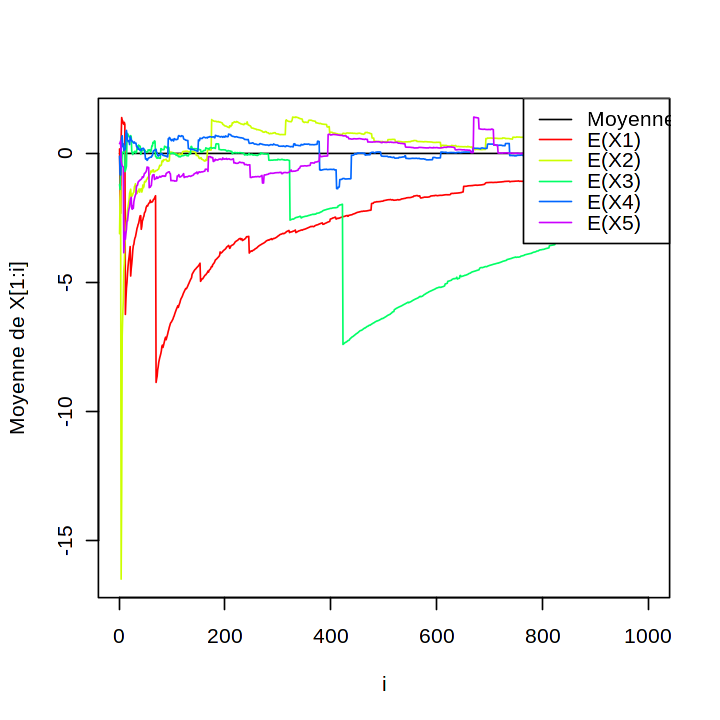

In [39]:
####################################
## Écrire votre réponse entre ici...

size = 1000
X   = matrix( rcauchy( 5 * size , location = 0 , scale = 1 ) , nrow = size )
moy = base::apply( X , 2 , cumsum ) / 1:size

base::options( repr.plot.width = 6 , repr.plot.height = 6 )
graphics::par( mfrow = base::c(1,1) )

colors = grDevices::rainbow(5)
plot( 1:size , base::rep( 0 , size ) , type = "l" , ylim = base::c(base::min(moy),base::max(moy)) , xlab = "i" , ylab = "Moyenne de X[1:i]" )
for( p in 1:5 )
	lines( 1:size , moy[,p] , col = colors[p] )
legend( "topright" , base::c("Moyenne","E(X1)","E(X2)","E(X3)","E(X4)","E(X5)") , col = base::c("black",colors) , lty = base::rep(1,6) )

## ... et la
####################################

### III.5 Conclusion
- Que constate t'on pour les lois uniformes, normales et exponentielle?
- Et pour la loi de Cauchy ?

## IV. Tirages aléatoires selon une loi quelconque

**Rappel** (Voir exo 2.5) Soit $X$ une variable aléatoire de loi $\mathbb{P}_X$, et de fonction de répartition $F_X(x) = \mathbb{P}(X\leq x)$ *inversible*. Soit $U$ une variable aléatoire de loi uniforme $\mathcal{U}(0,1)$. Alors:

$$F_X^{-1}(U)\sim\mathbb{P}_X$$

***Questions*** Déterminer un moyen de tirer des valeurs selon $\mathbb{P}_X$ si $F_X$ est connue et inversible.

### IV.1 Applications à des lois classiques
- Réaliser un tirage des lois $\mathcal{N}(0,1)$, $\mathcal{E}(2)$ et $\mathcal{C}(0,1)$ avec cette méthode.
- Réaliser un tirage selon ces lois avec les fonctions de R (c.f. III)

Pour chaque loi, sur un même graphique, afficher les trois courbes suivantes:
- `density(<tirage selon votre méthode>)`
- `density(<tirage avec les fonctions de R>)`
- `curve(d<loi>,min,max)`

Conclusion ?

In [11]:
####################################
## Écrire votre réponse entre ici...

size = 1000

No = qnorm(   runif(size) , mean = 0 , sd = 1 )
Eo = qexp(    runif(size) , rate = 2          )
Co = qcauchy( runif(size) , location = 0 , scale = 1 )

Nr = rnorm(   size , mean = 0 , sd = 1 )
Er = rexp(    size , rate = 2          )
Cr = rcauchy( size , location = 0 , scale = 1 )

## ... et la
####################################

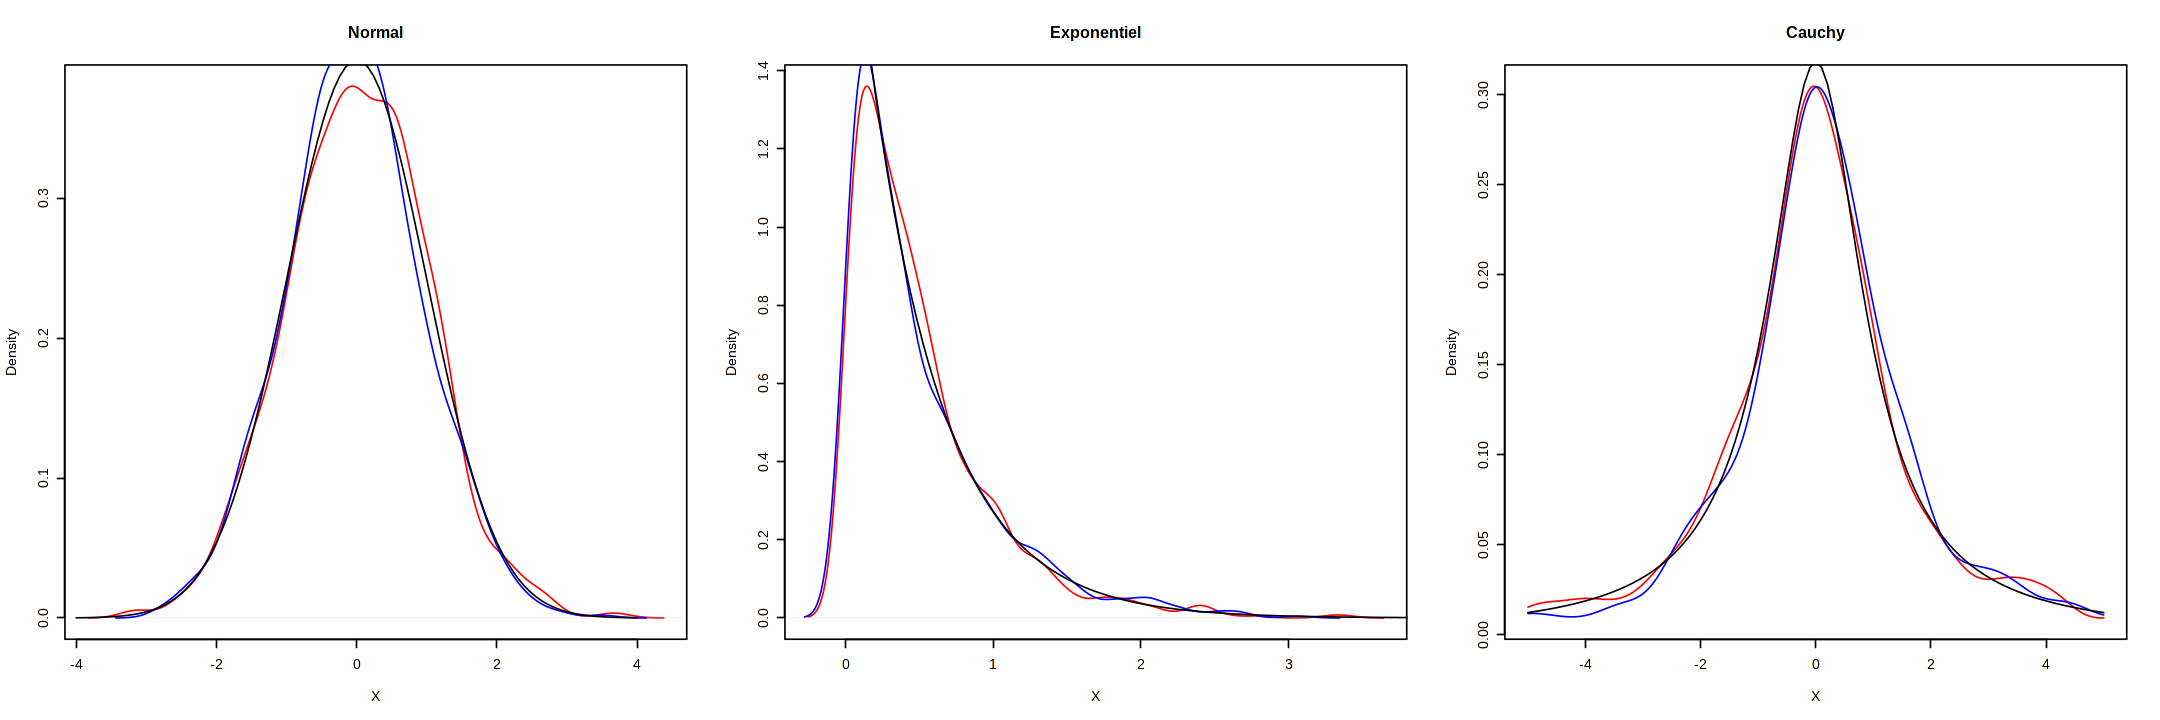

In [40]:
####################################
## Écrire votre réponse entre ici...

## Ce bout de code est spécifique à jupyter, il permet de controler la taille en "pixel" de la sortie graphique
nrow = 1 ## Nombre de lignes de sous-graphique
ncol = 3 ## Nombre de colonnes de sous-graphique
base::options( repr.plot.width = 6 * ncol , repr.plot.height = 6 * nrow )

graphics::par( mfrow = base::c(nrow,ncol) ) ## On construit un graphique découpé en 3 sous fenêtre cote à cote

plot( density(No)  , col = "red" , xlab = "X" , ylab = "Density" , main = "Normal" )
lines( density(Nr) , col = "blue" )
curve( dnorm , -4 , 4 , add = TRUE , col = "black" )

plot( density(Eo)  , col = "red" , xlab = "X" , ylab = "Density" , main = "Exponentiel" )
lines( density(Er) , col = "blue" )
dexp2 = function(x){ dexp( x , rate = 2 ) }
curve( dexp2 , 0 , 4 , add = TRUE , col = "black" )

plot( density(Co,from=-5,to=5)  , col = "red" , xlab = "X" , ylab = "Density" , main = "Cauchy" , xlim = base::c(-5,5) )
lines( density(Cr,from=-5,to=5) , col = "blue" )
curve( dcauchy , -5 , 5 , add = TRUE , col = "black" )


## ... et la
####################################

### IV.2 Construire notre propre loi

Le but de cette section est de construire notre propre loi, i.e. de construire les quatre fonctions génératrices : densité, CDF, quantile et générateur aléatoire. Nous allons travailler sur un type de loi de *puissance*, qui admet pour densité:

$$f_X(x) = \frac{r-1}{x^r}\mathbf{1}_{[1,\infty[}(x)$$

Rappelons que la CDF $F_X$ est donnée par:

$$F_X(x) = \int_{-\infty}^x f_X(t).\mathrm{d}t$$

***Questions***
- Construire la fonction de densité `dpow`,
- Construire la CDF `ppow`,
- Construire l'inverse de la CDF `qpow`,
- Construire le générateur aléatoire `rpow`,

In [4]:
####################################
## Écrire votre réponse entre ici...

dpow = function( x , r = 2. , log = FALSE )
{
	y = (r-1) / x^r
	y[x < 1] = 0
	if(log)
		return( base::log(y) )
	return(y)
}

ppow = function( q , r = 2. , lower.tail = TRUE , log.p = FALSE )
{
	if( !lower.tail )
	{
		lower_tail = ppow( q , r , lower.tail = TRUE )
		if( log.p )
			return( base::log(1-lower_tail) )
		
		return( 1. - lower_tail )
	}
	
	p = 1 - 1. / ( x^(r-1) )
	p[q < 1] = 0
	
	if(log.p)
		return(base::log(p))
	
	return(p)
}

qpow = function( p , r = 2. , lower.tail = TRUE , log.p = FALSE )
{
	if( log.p )
		return( qpow( base::exp(p) , r , lower.tail ) )
	
	if(!lower.tail)
		p = 1 - p
	
	q = 1. / ( (1-p)^( 1 / (r-1) ) )
	return(q)
}

rpow = function( n , r = 2. )
{
	return( qpow( runif(n) , r = r ) )
}

## ... et la
####################################

## V. Comportement asymptotique

***Rappel*** On a vu que si $S_n$ est la somme d'une famille iid de variable aléatoire $X$ tel que $\mathbb{E}(|X|)<\infty$, alors:

$$\lim_{n\to\infty} S_n= \mathbb{E}(X) = \mu$$

De plus, si $X$ admet un moment d'ordre 2 (i.e. $\mathbb{E}(|X|^2)<\infty$), en notant $\sigma^2$ la variance de $X$, on a:
- $\mathbb{E}(S_n) = n\mu$
- $\sigma_{S_n}^2 = n\sigma^2$.

On note de plus $Y_n = \frac{S_n-\mathbb{E}(S_n)}{\sigma_{S_n}}$ la variable centrée réduite de $S_n$.


***Question 1*** Exprimer $Y_n$ en fonction de $S_n$, $n$, $\mu$ et $\sigma$.

***Question 2*** Calculer $m=1000$ valeurs de $Y_n$ avec $n=1000$ lorsque la loi de $X$ est:
- Une loi normale $\mathcal{N}(2,2^2)$,
- Une loi exponentielle $\mathcal{E}(\lambda=3)$,
- Une loi de bernouilli $\mathcal{B}(p=0.25)$ (`rbinom`).

***Question 3*** Tracer les densités des différents $Y_n$ sur un même graphe, les comparer à la densité d'une loi $\mathcal{N}(0,1)$.

***Question 4*** Faire varier $m$ et $n$ pour voir leurs influences, et tester avec une loi gamma, de Cauchy, et la loi de puissance construite dans l'exercice précédent.

***Rappel*** Si $f$ est la densité d'une V.A. continue $X$, alors:
$$\mathbb{E}(X) = \int_{\mathbb{R}} xf(x).\mathrm{d}x$$
$$\mathrm{Var}(X) = \int_{\mathbb{R}} x^2f(x).\mathrm{d}x - \mathbb{E}(X)^2$$

***Question*** Quel théorème cet exercice illustre t'il ?

In [5]:
draw_Yn = function( m , rdist , mu , sigma , n = 1000 , ... )
{
	kwargs = list(...)
	kwargs$n = n * m
	X = matrix( base::do.call( rdist , kwargs ) , nrow = m )
	S = apply( X , 1 , sum )
	Y = ( S - n * mu ) / ( base::sqrt(n) * sigma )
	return(Y)
}

In [8]:
m = 10000
n = 1000

mu    = 2
sigma = 2
YN = draw_Yn( m , rnorm  , n = n , mu = mu , sigma = sigma , mean = mu , sd = sigma )

rate = 3
YE = draw_Yn( m , rexp   , n = n , mu = 1 / rate , sigma = 1 / rate , rate = rate )

p = 0.25
YB = draw_Yn( m , rbinom , n = n , mu = p , sigma = p * ( 1 - p ) , size = 1 , prob = p )

loc   = 0
scale = 1
YC = draw_Yn( m , rcauchy , n = n , mu = loc , sigma = scale , location = loc , scale = scale )

shape = 0.5
rate  = 3
YG = draw_Yn( m , rgamma , n = n , mu = shape / rate , sigma = shape / rate^2 , shape = shape , rate = rate )

r  = 5
mu = (r-1) / (r-2)
sigma = (r-1) / (r-3) - mu^2
YP = draw_Yn( m , rdist = rpow , n = n , mu = mu , sigma = sigma , r = r )

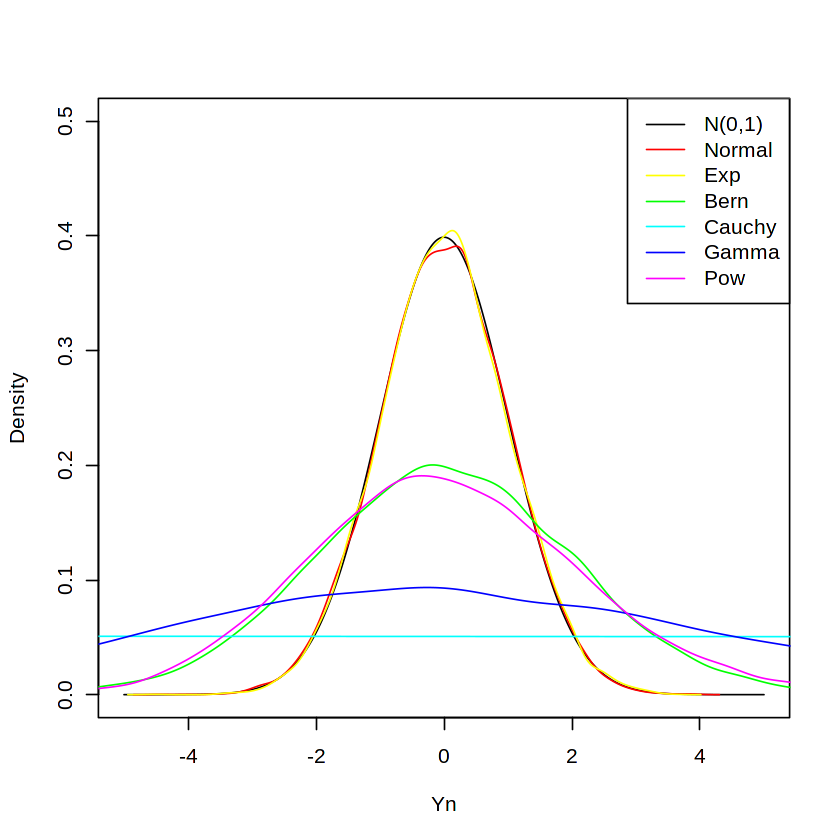

In [9]:
nrow = 1 ## Nombre de lignes de sous-graphique
ncol = 1 ## Nombre de colonnes de sous-graphique
base::options( repr.plot.width = 7 * ncol , repr.plot.height = 7 * nrow )

graphics::par( mfrow = base::c(nrow,ncol) ) ## On construit un graphique découpé en 3 sous fenêtre cote à cote

xlim = base::c(-5,5)
ylim = base::c(0 , 0.5 )

x = base::seq( xlim[1] , xlim[2] , length = 1000 )
plot( x , dnorm(x) , col = "black" , type = "l" , xlim = xlim , ylim = ylim , xlab = "Yn" , ylab = "Density" )

colors = rainbow(6)
lines( density(YN) , col = colors[1] )
lines( density(YE) , col = colors[2] )
lines( density(YB) , col = colors[3] )
lines( density(YC) , col = colors[4] )
lines( density(YG) , col = colors[5] )
lines( density(YP) , col = colors[6] )
legend( "topright" , base::c("N(0,1)","Normal","Exp","Bern","Cauchy","Gamma","Pow") , col = base::c("black",colors) , lty = base::rep(1,7) )


In [17]:
####################################
## Écrire votre réponse entre ici...

## ... et la
####################################